# 맵플롯립 Matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

## 지원 되는 플롯 유형

- 선그래프(line plot) : plot()
- 막대그래프(bar chart) : bar(), barh()
- 산점도(scatter plot) : scatter() 
- 히스토그램(histogram) : hist()
- 상자그림표(box plot) : boxplot()
- 원그래프(pie chart) : pie()
- 기타 다양한 유형의 차트/플롯을 지원
- https://matplotlib.org/stable/plot_types/index.html

## 1. 막대그래프 : bar(), barh(), df.plot()

### 1-1. 세로 막대 그래프 그리기: bar()
- bar(x,y,color=[],alpha=)
    - color = [] : 색상값 설정
    - alpha = 투명도 설정

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

#### 데이터셋

In [4]:
dust = pd.read_excel('data/fine_dust.xlsx', index_col='area')

#### 막대그래프

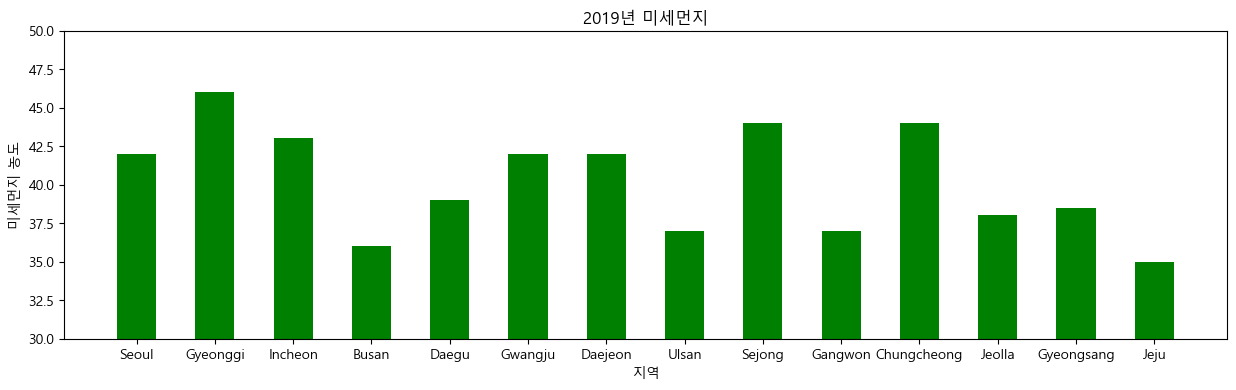

In [15]:
# 2019 미세먼지
plt.figure(figsize=(15,4))
plt.bar(dust.index, dust[2019], width= 0.5, color='g')
plt.title('2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
plt.ylim(30,50)
plt.show()

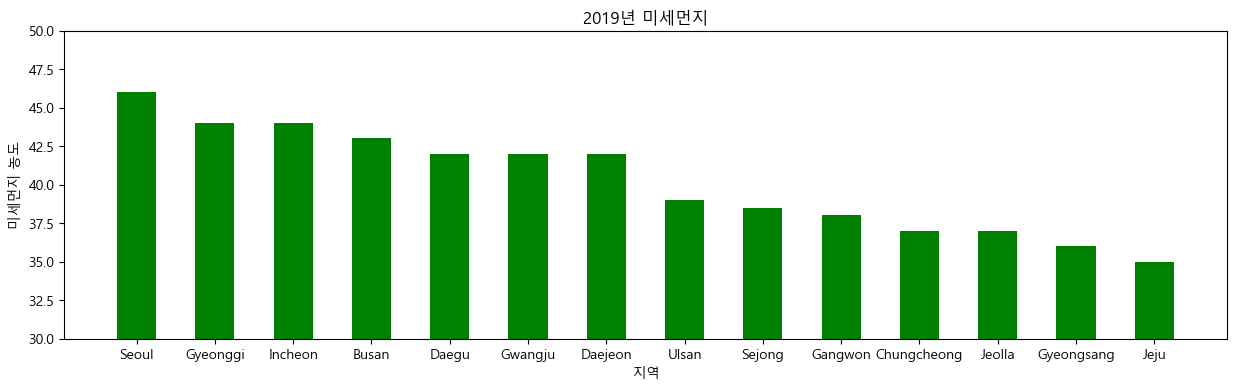

In [17]:
# 2019 미세먼지(값의 크기순)
data = dust[2019].sort_values(ascending=False)
plt.figure(figsize=(15,4))
plt.bar(dust.index, data, width= 0.5, color='g')
plt.title('2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
plt.ylim(30,50)
plt.show()

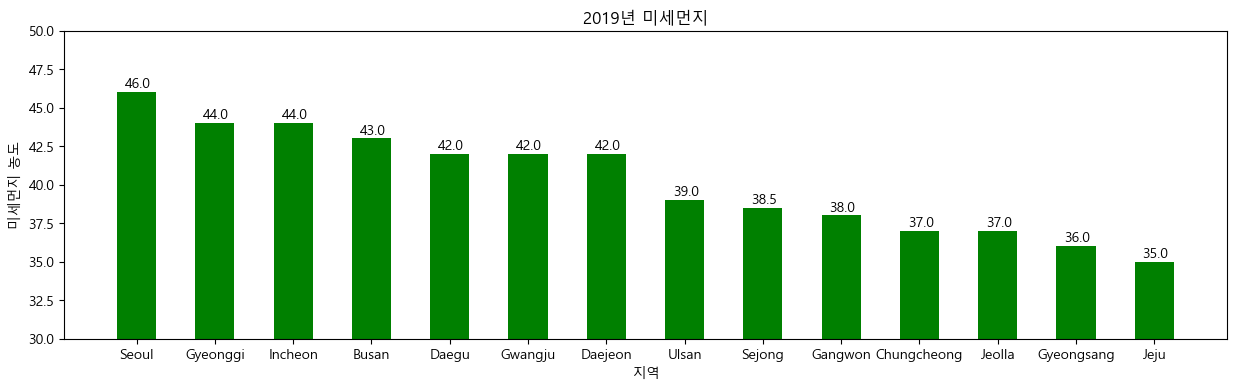

In [28]:
# 2019 미세먼지(값을 막대 위에 표기) -> plt.text(x, y, str, fontdict={})
data = dust[2019].sort_values(ascending=False)
plt.figure(figsize=(15,4))
plt.bar(dust.index, data, width= 0.5, color='g')
plt.title('2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
for i in range(len(data)):
    plt.text(x= i-0.15, y= data.iloc[i]+0.3, s= data.iloc[i])
plt.ylim(30,50)
plt.show()

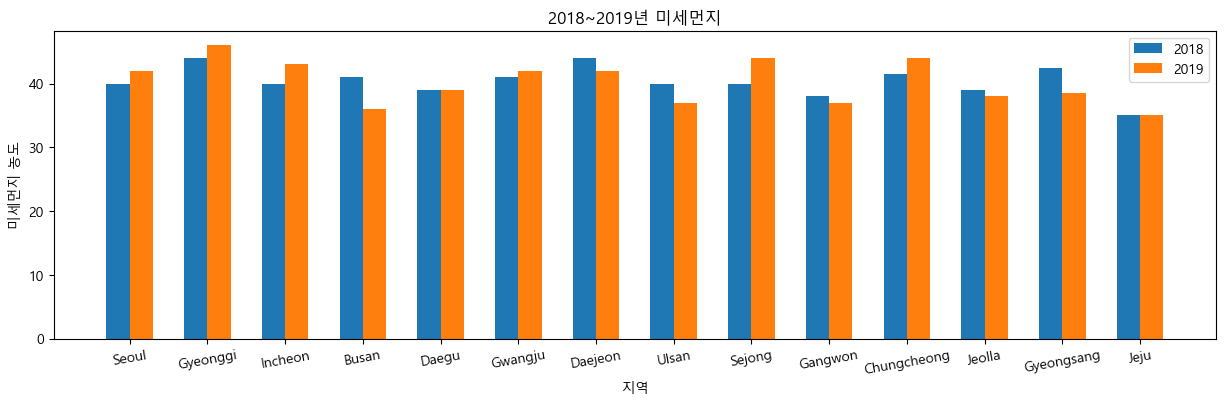

In [41]:
# 그룹 막대그래프
data= dust.loc[:,[2018,2019]]
x= np.arange(len(data))
plt.figure(figsize=(15,4))
plt.bar(x, data[2018], width= 0.3, label='2018')
plt.bar(x+0.3, data[2019], width= 0.3, label='2019')
plt.title('2018~2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
plt.xticks(x+0.15, data.index, rotation=10)
plt.legend()
plt.show()

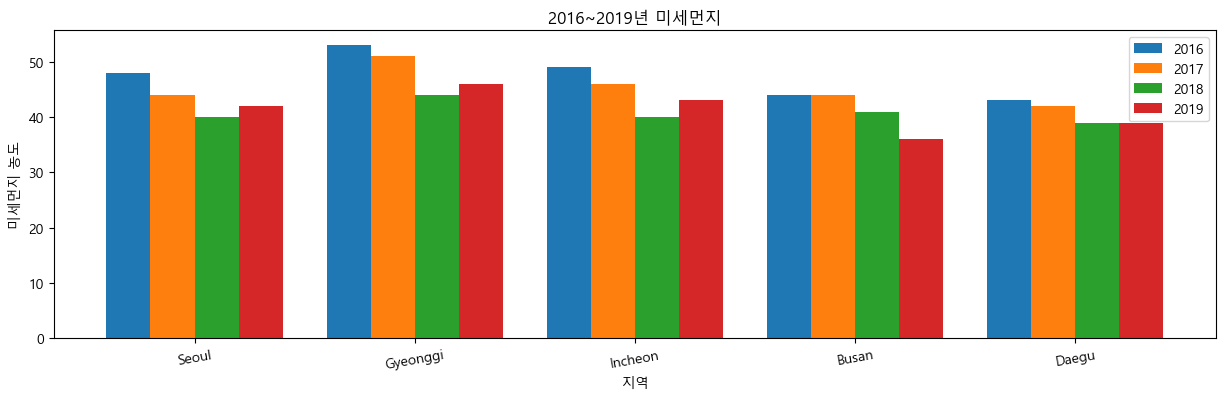

In [63]:
data= dust.loc[:'Daegu',2016:2019]
x= np.arange(len(data))
plt.figure(figsize=(15,4))
for year in data.columns:
    plt.bar(x, data[year], width= 0.2, label=str(year))
    x= x+0.2
plt.title('2016~2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
plt.xticks(x-0.5, data.index, rotation=10)
plt.legend()
plt.show()

In [68]:
data

area
Jeju           35.0
Busan          36.0
Ulsan          37.0
Gangwon        37.0
Jeolla         38.0
Gyeongsang     38.5
Daegu          39.0
Seoul          42.0
Gwangju        42.0
Daejeon        42.0
Incheon        43.0
Sejong         44.0
Chungcheong    44.0
Gyeonggi       46.0
Name: 2019, dtype: float64

### 1-2. 가로 막대 그래프 그리기 : barh()

- barh(x,y,color=[], alpha=)

matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', data=None, **kwargs)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

#### 데이터셋

In [52]:
dust.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0


#### 가로막대그래프

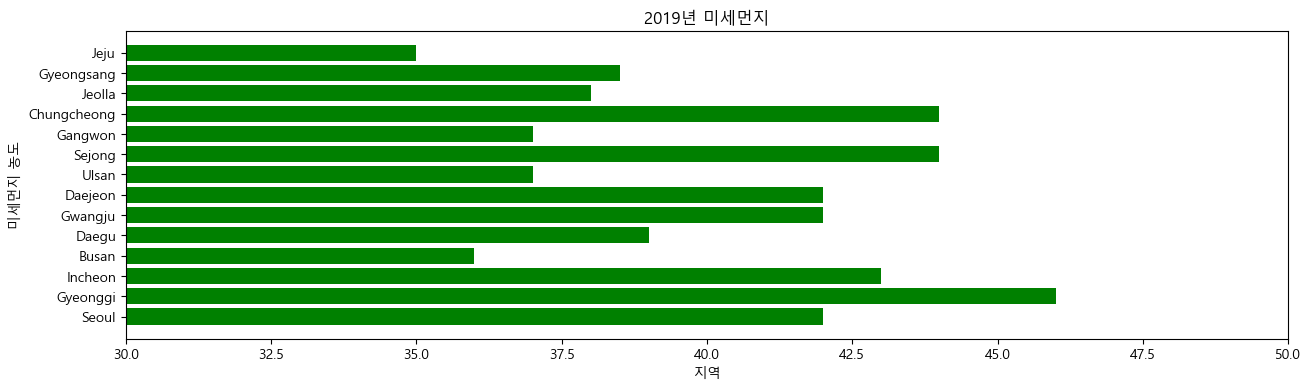

In [64]:
data = dust[2019]
plt.figure(figsize=(15,4))
plt.barh(dust.index, data, color='g')
plt.title('2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
plt.xlim(30,50)
plt.show()

- 막대 옆에 값 출력하기

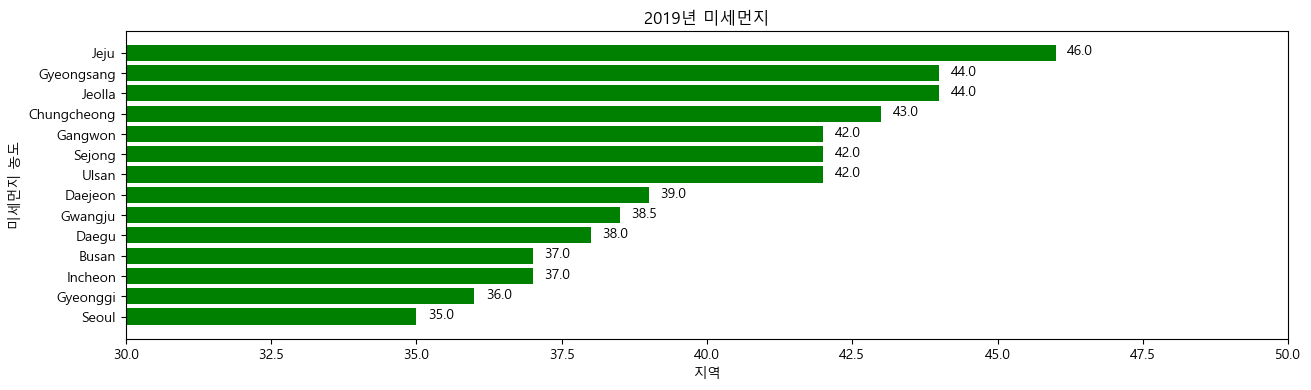

In [66]:
# 2019 미세먼지(값을 막대 위에 표기) -> plt.text(x, y, str, fontdict={})
data = dust[2019].sort_values()
plt.figure(figsize=(15,4))
plt.barh(dust.index, data, color='g')
plt.title('2019년 미세먼지')
plt.xlabel('지역')
plt.ylabel('미세먼지 농도')
plt.xlim(30,50)
for i in range(len(data)):
    y= data.iloc[i]
    plt.text(y+0.2,i-0.1, y)
plt.show()

### 1-3. 데이터프레임으로 막대그래프 그리기

- **데이터프레임.plot**(kind=그래프종류, grid=T/F, figsize=그래프크기)
- **plt.bar**(데이터프레임.변수1, 데이터프레임.변수2)
- **plt.barh**(데이터프레임.변수1, 데이터프레임.변수2)

**데이터프레임.plot()으로 막대그래프 그리기**

- plt.xticks()의 rotation 인수에 따라 가로형 또는 세로형 막대그래프 생성
    - plt.xticks(ticks=None, labels=None, **kwargs)
    - plt.xticks(ticks=None, labels=None) : vertical 기본
    - plt.xticks(ticks=None, labels=None, rotation='vertical') : 가로형막대
    - plt.xticks(ticks=None, labels=None, rotation='horizontal') : 세로형막대

#### 데이터셋

In [69]:
dust.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
area,,,,,,,,,,,,,,,,,,,
Seoul,71.0,76.0,69.0,61.0,58.0,60,61,55.0,54.0,49.0,47,41.0,45.0,46.0,45.0,48.0,44.0,40.0,42.0
Gyeonggi,71.0,74.0,68.0,67.0,65.0,68,66,60.0,60.0,58.0,56,49.0,54.0,54.0,53.0,53.0,51.0,44.0,46.0
Incheon,52.0,57.0,61.0,62.0,61.0,68,64,57.0,60.0,55.0,55,47.0,49.0,49.0,53.0,49.0,46.0,40.0,43.0


#### 막대그래프

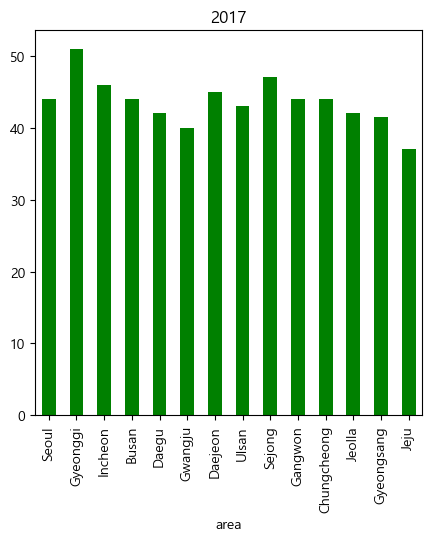

In [78]:
data = dust[2017]
data.plot.bar(figsize=(5,5),title='2017',color='g')
plt.show()

**데이터프레임.plot()를 이용하여 묶음 막대그래프 그리기**
- 그래프를 그리기 위한 데이터를 지정하지 않는 경우
- 데이터프레임에 있는 모든 수치데이터를 이용하여 묶음 막대그래프를 그림

#### 데이터셋

In [79]:
data= dust.loc['Seoul':'Daegu', 2016:2019]

#### 묶음 막대그래프

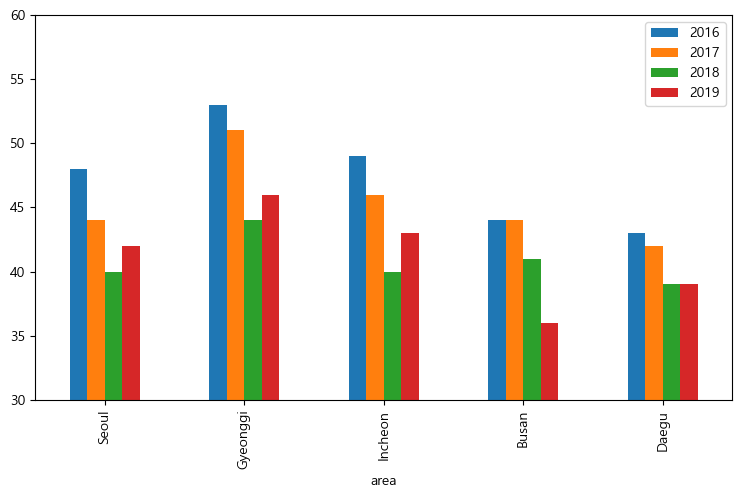

In [84]:
data.plot.bar(figsize=(9,5))
plt.ylim(30,60)
plt.show()

**정렬된 데이터를 이용하여 막대그래프 그리기**

In [87]:
data2 = data.sort_values(2019)
data2

,2016,2017,2018,2019
area,,,,
Busan,44.0,44.0,41.0,36.0
Daegu,43.0,42.0,39.0,39.0
Seoul,48.0,44.0,40.0,42.0
Incheon,49.0,46.0,40.0,43.0
Gyeonggi,53.0,51.0,44.0,46.0


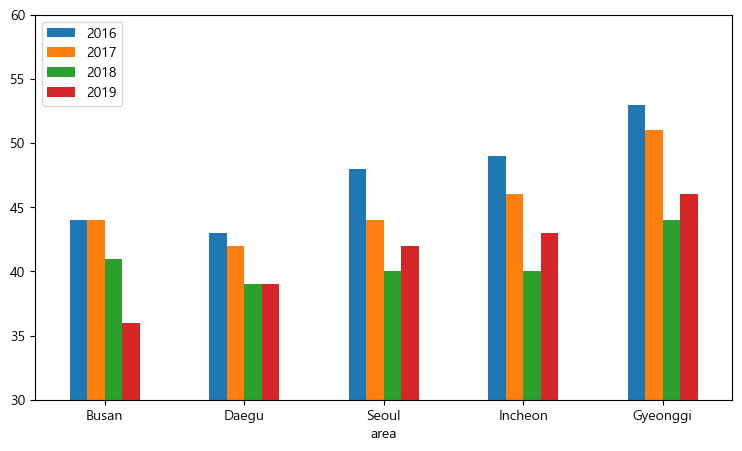

In [90]:
data2.plot.bar(figsize=(9,5))
plt.ylim(30,60)
plt.xticks(rotation=0)
plt.show()

## 2. 산점도(scatter plot) : scatter()

- 두 수치형 변수간의 관계를 나타내기 위해 사용하는 그래프
    - 상관관계 표현 : 선형성

- 형식 : matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

#### 예제 데이터
- 2022년 건강검진 데이터: 백만명 중 1000명 샘플링
- 데이터 파일: 'health_screenings_2022_1000ea.csv'
- 출처: 국민건강보험공단(공공데이터 포털) 

In [92]:
health = pd.read_csv('data/health_screenings_2022_1000ea.csv', encoding='utf-8')
health.head(3)

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,urine_protein,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar
0,2022,11,1,9,165,60,75.0,1.0,1.2,1.0,...,1.0,1.0,23.0,13.0,14.0,2.0,1.0,0,NaN,NaN
1,2022,11,2,13,155,60,88.0,0.8,1.0,1.0,...,1.0,0.6,17.0,18.0,13.0,1.0,0.0,0,NaN,NaN
2,2022,31,2,13,150,50,73.6,0.7,0.6,1.0,...,1.0,0.8,14.0,9.0,12.0,1.0,0.0,1,0.0,0.0


#### 산점도 그리기

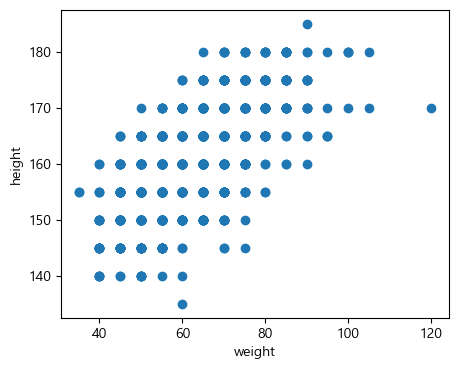

In [95]:
plt.figure(figsize=(5,4))
plt.scatter(health.weight, health.height)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

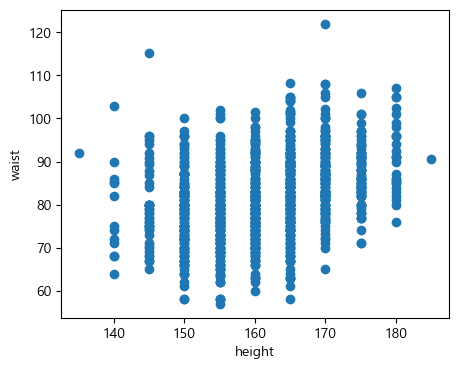

In [96]:
plt.figure(figsize=(5,4))
plt.scatter(health.height, health.waist)
plt.xlabel('height')
plt.ylabel('waist')
plt.show()

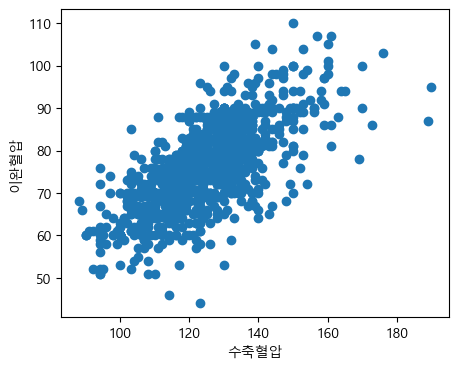

In [97]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic)
plt.xlabel('수축혈압')
plt.ylabel('이완혈압')
plt.show()

### 산점도의 marker 변경

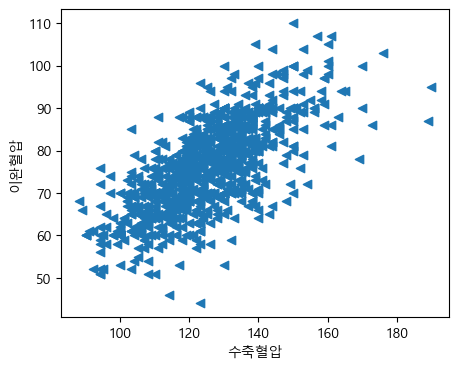

In [100]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='<')
plt.xlabel('수축혈압')
plt.ylabel('이완혈압')
plt.show()

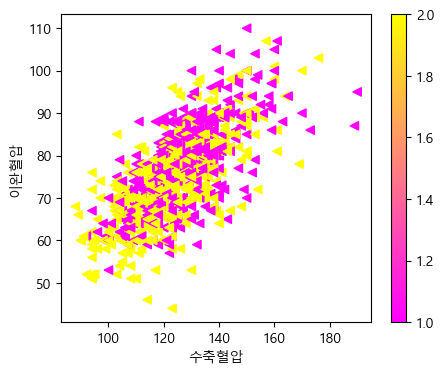

In [114]:
plt.figure(figsize=(5,4))
plt.scatter(health.systolic, health.diastolic, marker='<', c=health.gender)
plt.colorbar()
plt.xlabel('수축혈압')
plt.ylabel('이완혈압')
plt.show()

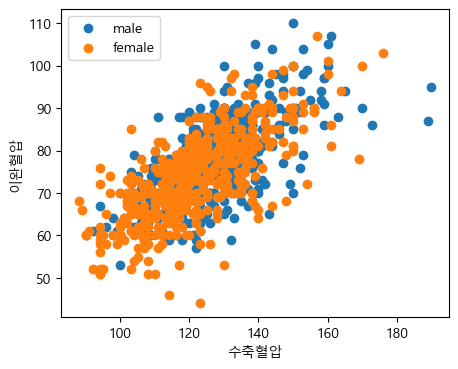

In [103]:
male= health[health.gender == 1]
female= health[health.gender == 2]

plt.figure(figsize=(5,4))
plt.scatter(male.systolic, male.diastolic, label='male')
plt.scatter(female.systolic, female.diastolic, label='female')
plt.xlabel('수축혈압')
plt.ylabel('이완혈압')
plt.legend()
plt.show()

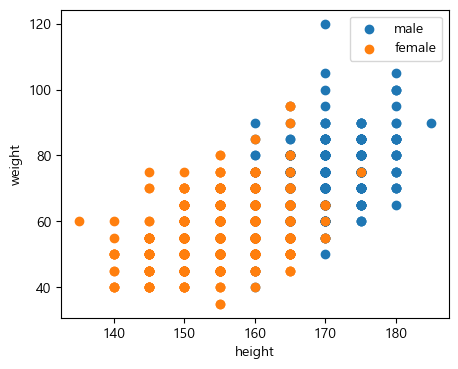

In [113]:
male= health[health.gender == 1]
female= health[health.gender == 2]

plt.figure(figsize=(5,4))
plt.scatter(male.height, male.weight, label='male')
plt.scatter(female.height, female.weight, label='female')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

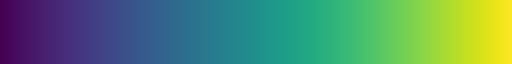

<Figure size 640x480 with 0 Axes>

In [117]:
# matplotlib.colors.Colormap: colormap()
plt.set_cmap(plt.viridis())
plt.get_cmap()

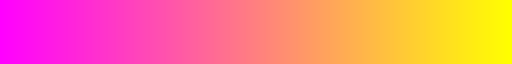

<Figure size 640x480 with 0 Axes>

In [112]:
plt.set_cmap(plt.spring())
plt.get_cmap()

### 버블차트
- 점의 크기와 색상을 이용하여 서로 다른 데이터 값을 표시하는 그래프
- scatter(c, s)를 이용하여 작성
    - s 인수 : size
    - c 인수 : color

#### 데이터 생성

In [115]:
n= 50
x= np.random.rand(n)
y1= np.random.rand(n)
y2= np.random.rand(n)
y3= np.pi*(np.random.rand(n)*15)**2

#### 버블차트

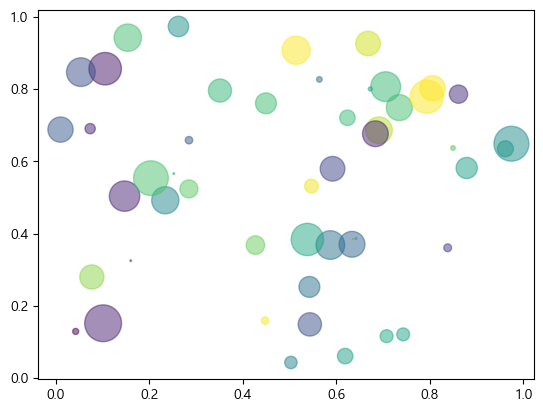

In [119]:
plt.scatter(x,y1,c=y2,s=y3, alpha=0.5)
plt.show()

### 산점도에 colorbar() 적용

- 산점도를 그린 후 colorbar()를 생성하여 색상 정보를 막대로 표현

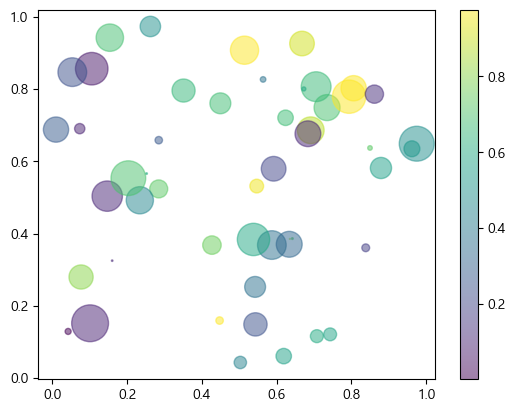

In [120]:
plt.scatter(x,y1,c=y2,s=y3, alpha=0.5)
plt.colorbar()
plt.show()

#### auto 데이터셋

In [122]:
auto= pd.read_csv('data/auto_mpg.csv', header=None)
auto.head(3)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [123]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [124]:
auto.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'accel', 'model_year', 'origin', 'car_name']
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


#### auto데이터셋 : 산점도

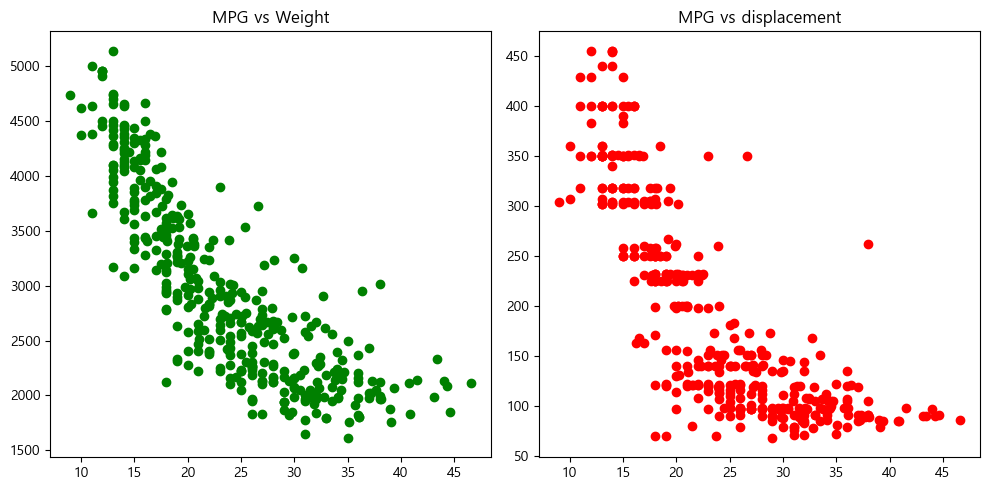

In [138]:
fig, axes = plt.subplots(1,2,figsize=(10,5), tight_layout=True)

axes[0].scatter(auto.mpg, auto.weight, color='g')
axes[0].set_title('MPG vs Weight')

axes[1].scatter(auto.mpg, auto.displacement, color='r')
axes[1].set_title('MPG vs displacement')

plt.show()

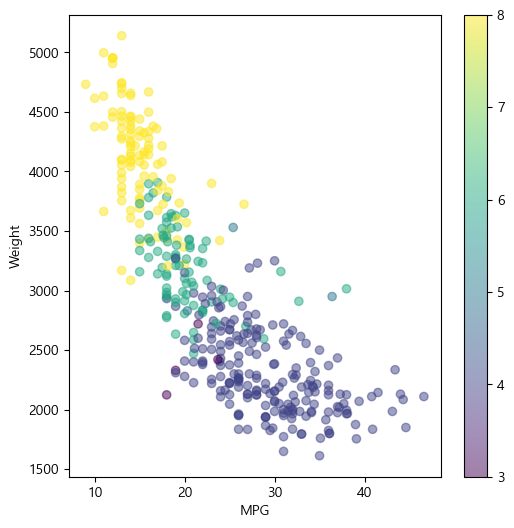

In [146]:
plt.figure(figsize=(6,6))
plt.scatter(auto.mpg, auto.weight, c=auto.cylinders,alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.colorbar()
plt.show()

## 3. 히스토그램 : hist()

- 연속형 수치형 데이터의 분포 시각화
- 참고. 막대그래프는 범주형 데이터의 빈도(비율) 분포 시각화

- 형식. matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

#### 데이터생성

In [147]:
np.random.seed(0)
x= np.random.randn(1000)

#### 히스토그램 그리기

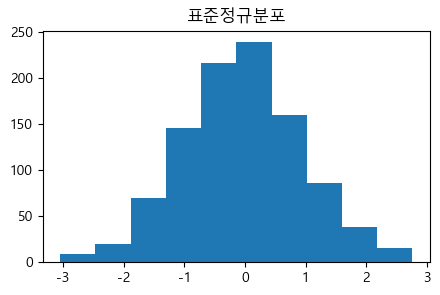

In [152]:
plt.figure(figsize=(5,3))
plt.hist(x)
plt.title('표준정규분포')
plt.show()

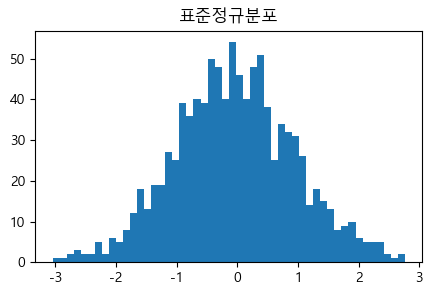

In [153]:
# hist(bins=)
plt.figure(figsize=(5,3))
plt.hist(x, bins=50)
plt.title('표준정규분포')
plt.show()

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

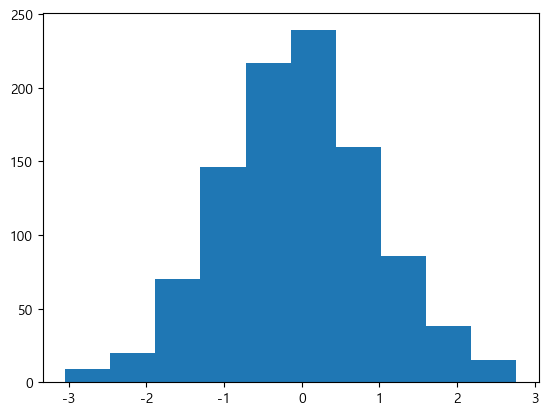

In [156]:
# plt.hist(x,bins=)[0] = 구간 별 개수 / [1]=구간 값 / [2]=pathes
n, bins, pathes = plt.hist(x,bins=10)
bins

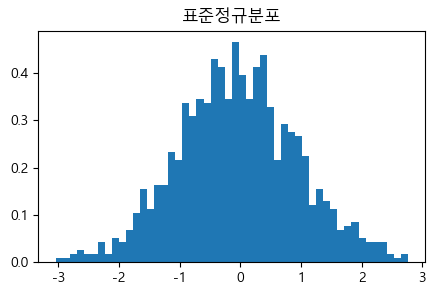

In [157]:
# hist(dsnsity=True)
plt.figure(figsize=(5,3))
plt.hist(x, bins=50, density=True)
plt.title('표준정규분포')
plt.show()

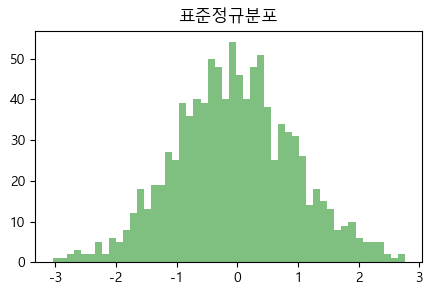

In [158]:
# hist(facecolor=, alpha=)
plt.figure(figsize=(5,3))
plt.hist(x, bins=50, facecolor='g', alpha=0.5)
plt.title('표준정규분포')
plt.show()

#### auto 데이터셋

In [159]:
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,accel,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


#### 히스토그램 그리기

#### 문제. 

auto-mpg 데이터셋에서 4개의 변수('mpg', 'cylinders', 'displacement', 'weight')에 대한 히스토그램을 한 그림에 그리기

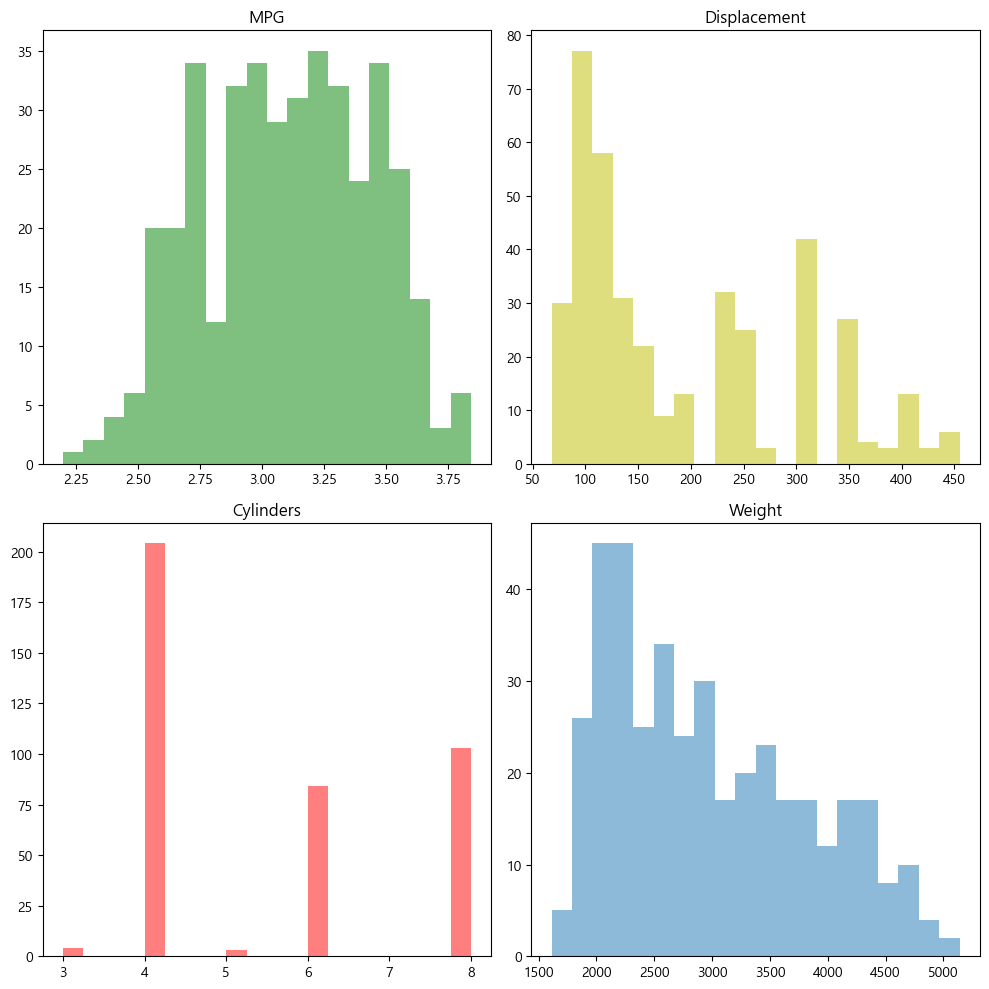

In [170]:
fig, axes= plt.subplots(2,2, figsize=(10,10))
axes[0,0].hist(auto.mpg,color='g',alpha=0.5, bins=20)
axes[0,0].set_title('MPG')

axes[1,0].hist(auto.cylinders, color='r',alpha=0.5, bins=20)
axes[1,0].set_title('Cylinders')

axes[0,1].hist(auto.displacement,color='y',alpha=0.5, bins=20)
axes[0,1].set_title('Displacement')

axes[1,1].hist(auto.weight,alpha=0.5, bins=20)
axes[1,1].set_title('Weight')

plt.tight_layout()
plt.show()

#### 비대칭인 자료를 대칭으로 로그변환

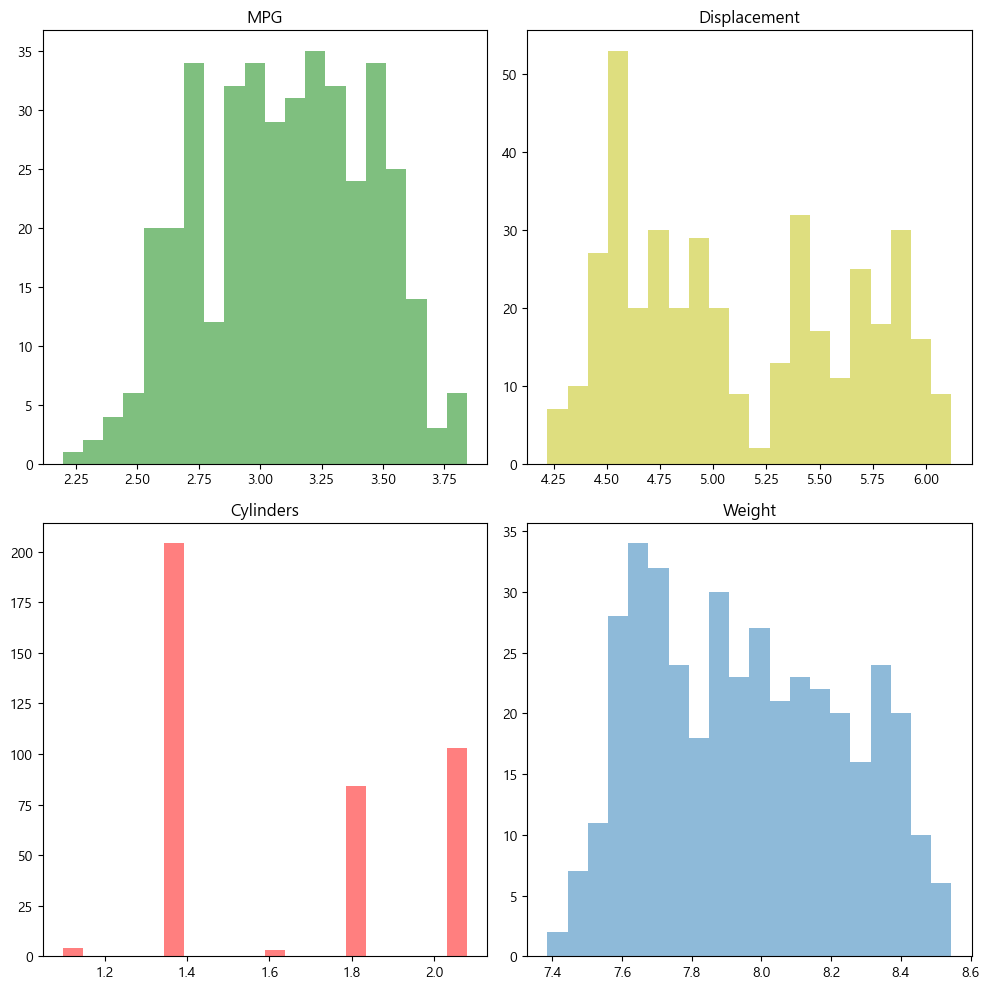

In [171]:
fig, axes= plt.subplots(2,2, figsize=(10,10))
axes[0,0].hist(np.log(auto.mpg),color='g',alpha=0.5, bins=20)
axes[0,0].set_title('MPG')

axes[1,0].hist(np.log(auto.cylinders), color='r',alpha=0.5, bins=20)
axes[1,0].set_title('Cylinders')

axes[0,1].hist(np.log(auto.displacement),color='y',alpha=0.5, bins=20)
axes[0,1].set_title('Displacement')

axes[1,1].hist(np.log(auto.weight),alpha=0.5, bins=20)
axes[1,1].set_title('Weight')

plt.tight_layout()
plt.show()

## 4. 박스플롯 : boxplot()

- 데이터의 분포를 파악해주는 플롯
    - 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
    
- 이상치 데이터 탐색을 위해 사용

- 형식 : matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)[source]



https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

#### 데이터생성

In [172]:
normal1= np.random.normal(loc=0,scale=1,size=1000)
normal2= np.random.normal(loc=5,scale=0.5,size=1000)
normal3= np.random.normal(loc=10,scale=2,size=1000)


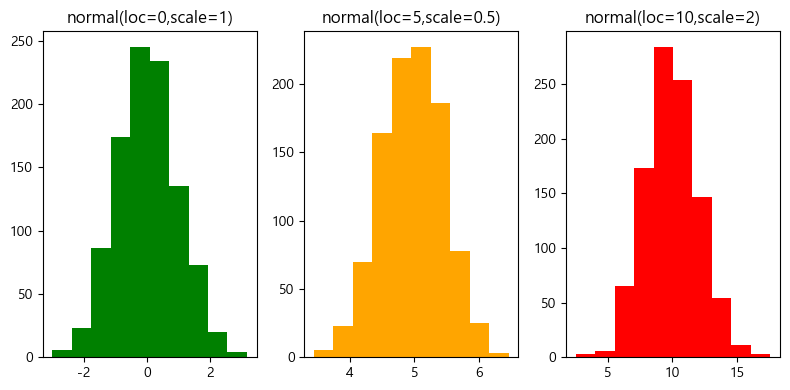

In [177]:
fig, axes = plt.subplots(1,3,figsize=(8,4))
axes[0].hist(normal1,color='g')
axes[0].set_title('normal(loc=0,scale=1)')

axes[1].hist(normal2,color='orange')
axes[1].set_title('normal(loc=5,scale=0.5)')

axes[2].hist(normal3,color='r')
axes[2].set_title('normal(loc=10,scale=2)')

plt.tight_layout()
plt.show()

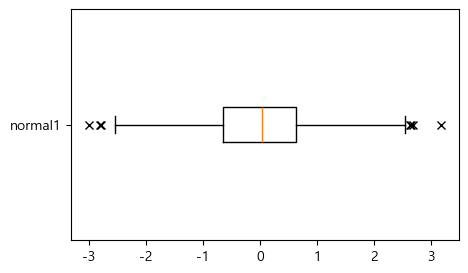

In [182]:
plt.figure(figsize=(5,3))
plt.boxplot(normal1, sym='x',vert=False)
plt.yticks([1],['normal1'])
plt.show()

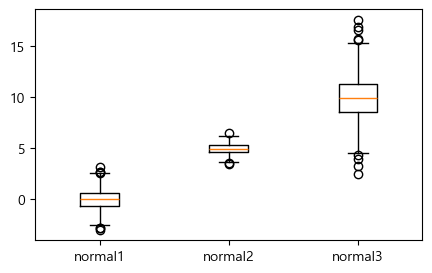

In [183]:
plt.figure(figsize=(5,3))
plt.boxplot((normal1,normal2,normal3))
plt.xticks([1,2,3],['normal1','normal2','normal3'])
plt.show()

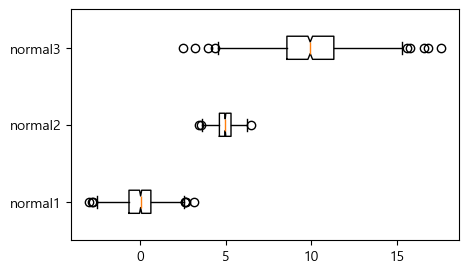

In [186]:
plt.figure(figsize=(5,3))
plt.boxplot((normal1,normal2,normal3),notch=True,vert=False)
plt.yticks([1,2,3],['normal1','normal2','normal3'])
plt.show()

#### auto 데이터셋의 'mpg', 'cylinders', 'displacement', 'weight'

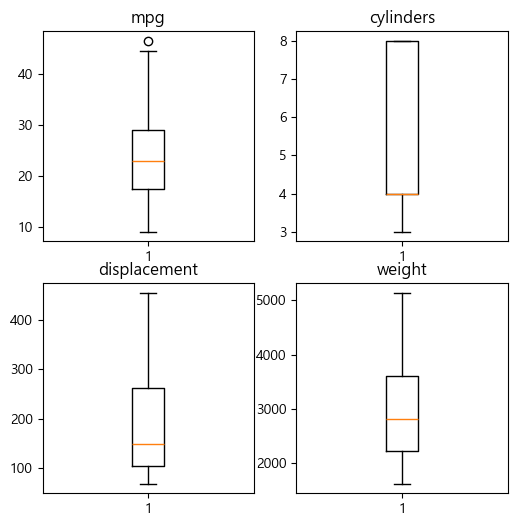

In [189]:
nrow, ncol=2,2
colnames=['mpg', 'cylinders', 'displacement', 'weight']
fig, axes = plt.subplots(2,2, figsize=(6,6))
for i in range(nrow):
    for j in range(ncol):
        n= ncol*i+j
        col=colnames[n]
        axes[i,j].boxplot(auto[col])
        axes[i,j].set_title(col)
plt.show()

#### origin의 값에 따른 mpg의 박스플롯

In [190]:
auto.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

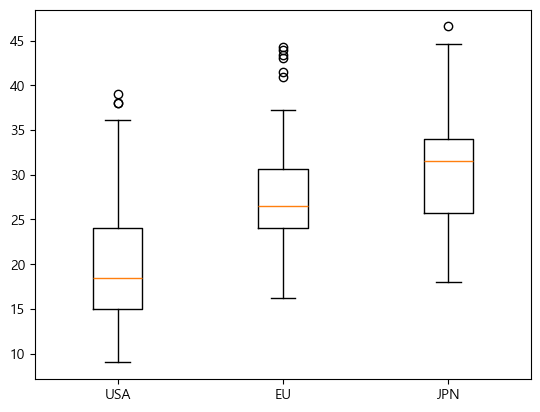

In [194]:
plt.boxplot([auto[auto.origin==1].mpg,
            auto[auto.origin==2].mpg,
            auto[auto.origin==3].mpg], labels=['USA','EU','JPN'])

plt.show()             

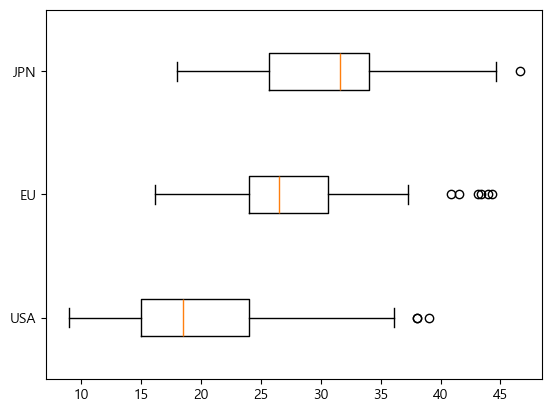

In [195]:
plt.boxplot([auto[auto.origin==1].mpg,
            auto[auto.origin==2].mpg,
            auto[auto.origin==3].mpg], labels=['USA','EU','JPN'],vert=False)

plt.show()             

#### 문제. origin의 값에 따른 weight의 박스플롯과 displacement의 박스플롯 한 그림 내에 그리기

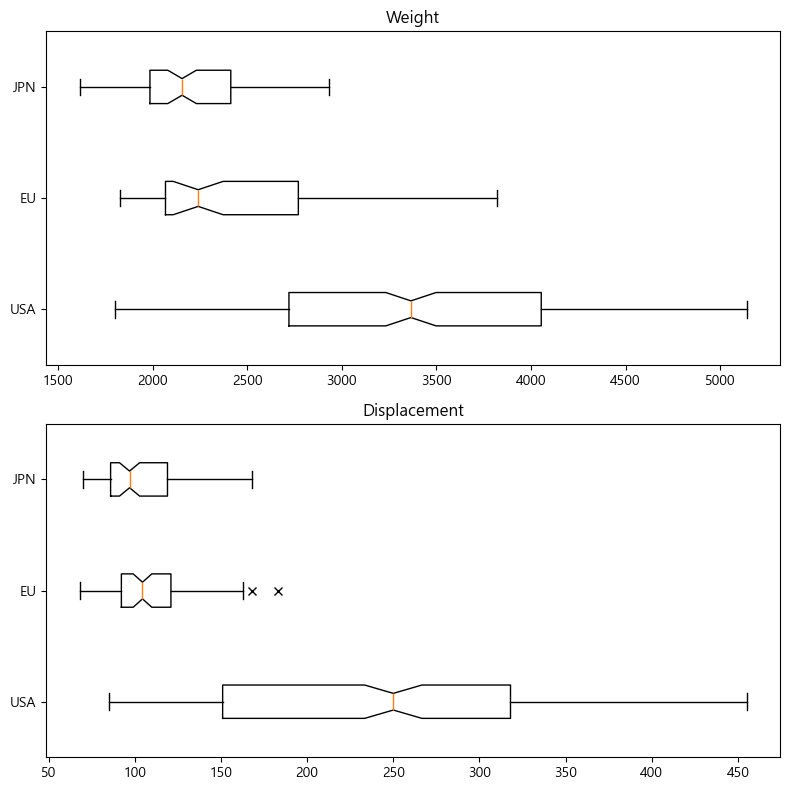

In [209]:
fig, axes = plt.subplots(2,1, tight_layout=True, figsize=(8,8))
axes[0].boxplot([auto[auto.origin==1].weight,
            auto[auto.origin==2].weight,
            auto[auto.origin==3].weight], labels=['USA','EU','JPN'],
                vert=False, sym='x',notch=True)
axes[0].set_title('Weight')
            
axes[1].boxplot([auto[auto.origin==1].displacement,
                 auto[auto.origin==2].displacement,
                 auto[auto.origin==3].displacement], labels=['USA','EU','JPN'],
                vert=False, sym='x',notch=True)
axes[1].set_title('Displacement')
plt.show()             

## 5. 파이차트 : pie()

- 범주형 데이터의 빈도(비율)을 비교하기 위해 사용하는 차트
- 원의 형태를 유지할 수 있도록 다음 명령을 실행해야 함
    - plt.axis('equal')
    - 콘솔에서는 별 다른 변화 없으나 plot창에서는 필요함

- 형식 : matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None,  startangle=0, radius=1, ...)


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

#### 데이터셋

In [210]:
cnt=[15,20,45,30]
labels= ['김밥','김치찌개','짜장면','돈까스']

#### pie chart 그리기

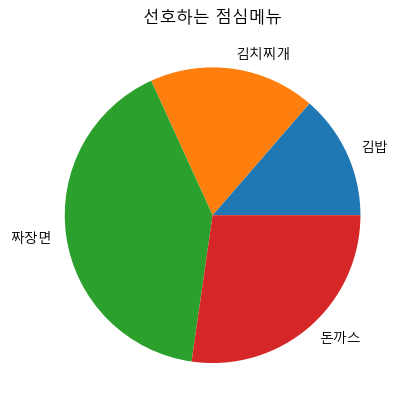

In [214]:
plt.pie(cnt, labels=labels)
plt.title('선호하는 점심메뉴')
plt.show()

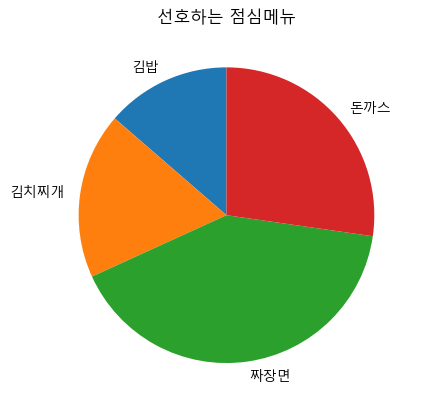

In [215]:
# startangle=시작 각도 defalut-> 0
plt.pie(cnt, labels=labels,startangle=90)
plt.title('선호하는 점심메뉴')
plt.show()

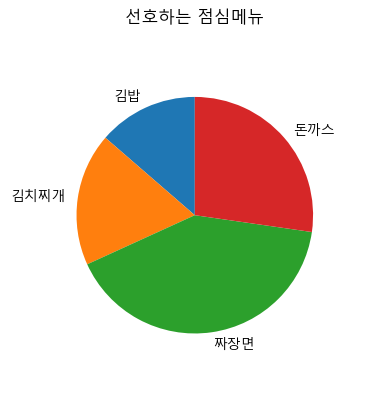

In [216]:
# radius=반지름(크기조절)
plt.pie(cnt, labels=labels,startangle=90,radius=0.8)
plt.title('선호하는 점심메뉴')
plt.show()

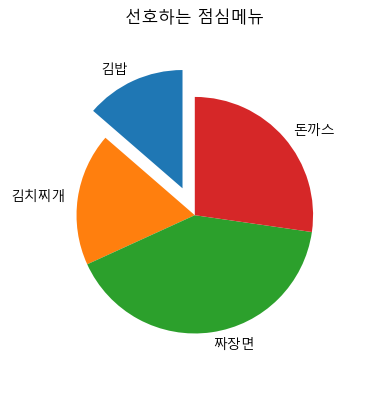

In [219]:
# explode= 튀어나오는 효과
plt.pie(cnt, labels=labels,startangle=90,radius=0.8,explode=[0.2,0,0,0])
plt.title('선호하는 점심메뉴')
plt.show()

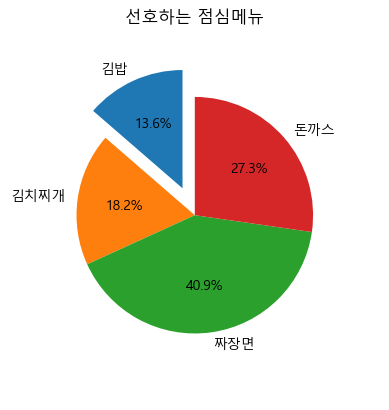

In [221]:
# autopct= %표기
plt.pie(cnt, labels=labels,startangle=90,radius=0.8,
        explode=[0.2,0,0,0],autopct='%.1f%%')
plt.title('선호하는 점심메뉴')
plt.show()

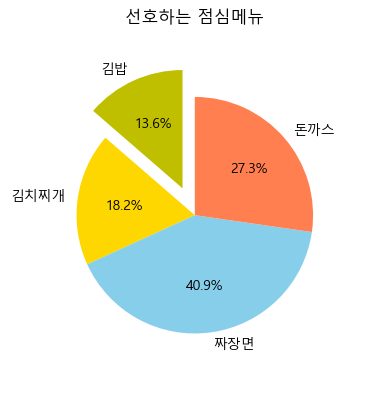

In [224]:
# colors=
plt.pie(cnt, labels=labels,startangle=90,radius=0.8,
        explode=[0.2,0,0,0],autopct='%.1f%%',colors=['y','gold','skyblue','coral'])
plt.title('선호하는 점심메뉴')
plt.show()

#### 문제. auto 데이터셋에서  cylinders, origin에 대한 pie 표현

In [226]:
cyl_cnt=auto.cylinders.value_counts()
ori_cnt=auto.origin.value_counts()

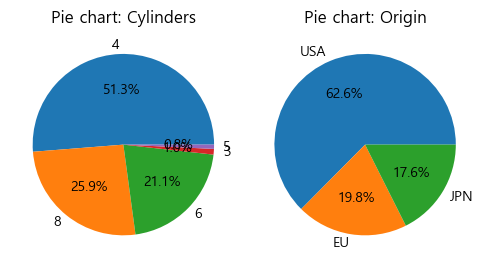

In [235]:
fig, axes=plt.subplots(1,2,figsize=(5,5),tight_layout=True)
axes[0].pie(cyl_cnt,labels=cyl_cnt.index,autopct='%.1f%%')
axes[0].set_title('Pie chart: Cylinders')

axes[1].pie(ori_cnt,labels=['USA','EU','JPN'],autopct='%.1f%%')
axes[1].set_title('Pie chart: Origin')

plt.show()

-----